# MACHINE LEARNING TECHNIQUES FOR Used Cars Price Prediction

This project is based on Used Cars Price Prediction. The dataset for this research work was downloaded from the Kaggle an open online community for Machine Learning professionals. The dataset contains 852123 instances and 8 attributes. Imported a comprehensive set of packages

In [1]:
#import the packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from scipy.sparse import csr_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.dummy import DummyRegressor


import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading and Preview the dataset
df = pd.read_csv('C:/Users/girit/Desktop/Used_Car_Prediction.csv')
df

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic
...,...,...,...,...,...,...,...,...
852117,63215,2017,9,Culver City,CA,YV1A22MK9H1013237,Volvo,S90T6
852118,72260,2017,3201,Englewood,NJ,YV4A22PL3H1186162,Volvo,XC90T6
852119,55999,2016,28941,Fort Collins,CO,YV4A22PL4G1000868,Volvo,XC90AWD
852120,60240,2017,3005,San Leandro,CA,YV4A22NLXH1006162,Volvo,V90


# DATA STRUCTURE AND STASTICAL ANALYSIS

In [3]:
# Display the first few rows to verify preprocessing
df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [4]:
#(Displaying the top 10 rows of the data set)
df.tail()

,Price,Year,Mileage,City,State,Vin,Make,Model
852117,63215,2017,9,Culver City,CA,YV1A22MK9H1013237,Volvo,S90T6
852118,72260,2017,3201,Englewood,NJ,YV4A22PL3H1186162,Volvo,XC90T6
852119,55999,2016,28941,Fort Collins,CO,YV4A22PL4G1000868,Volvo,XC90AWD
852120,60240,2017,3005,San Leandro,CA,YV4A22NLXH1006162,Volvo,V90
852121,76995,2017,2502,New York,NY,YV4BC0ZX1H1109845,Volvo,XC90T8


In [5]:
#Checking the shape of the dataset

df.shape

(852122, 8)

In [6]:
#Checking the shape of the dataset
df.size

6816976

In [7]:
# Check the number of unique values of each column
df.nunique()

Price       47124
Year           22
Mileage    158836
City         2553
State          59
Vin        852075
Make           58
Model        2736
dtype: int64

In [8]:
#Getting info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852122 entries, 0 to 852121
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    852122 non-null  int64 
 1   Year     852122 non-null  int64 
 2   Mileage  852122 non-null  int64 
 3   City     852122 non-null  object
 4   State    852122 non-null  object
 5   Vin      852122 non-null  object
 6   Make     852122 non-null  object
 7   Model    852122 non-null  object
dtypes: int64(3), object(5)
memory usage: 52.0+ MB


# DATA PREPARATION

In [9]:
#descriptive statiscics (Sum, Average, Variance, minimum, 1st quartile, 2nd quartile, 3rd Quartile and Maximum)
df.describe()

,Price,Year,Mileage
count,852122.000000,852122.000000,8.521220e+05
mean,21464.100210,2013.289145,5.250779e+04
std,13596.202241,3.414987,4.198896e+04
min,1500.000000,1997.000000,5.000000e+00
25%,13000.000000,2012.000000,2.383600e+04
50%,18500.000000,2014.000000,4.025600e+04
75%,26995.000000,2016.000000,7.218600e+04
max,499500.000000,2018.000000,2.856196e+06


In [10]:
#getting the list of the column in the dataset
df.columns

Index(['Price', 'Year', 'Mileage', 'City', 'State', 'Vin', 'Make', 'Model'], dtype='object')

In [11]:
# check Missing value
df.isnull().sum()

Price      0
Year       0
Mileage    0
City       0
State      0
Vin        0
Make       0
Model      0
dtype: int64

In [12]:
# dupicates
df.duplicated().sum()

30

In [13]:
#Missng data nad percentage missing
missing_perc = (df.isnull().mean() * 100).round(2)
print(missing_perc.apply(lambda x: f"{x}%"))

Price      0.0%
Year       0.0%
Mileage    0.0%
City       0.0%
State      0.0%
Vin        0.0%
Make       0.0%
Model      0.0%
dtype: object


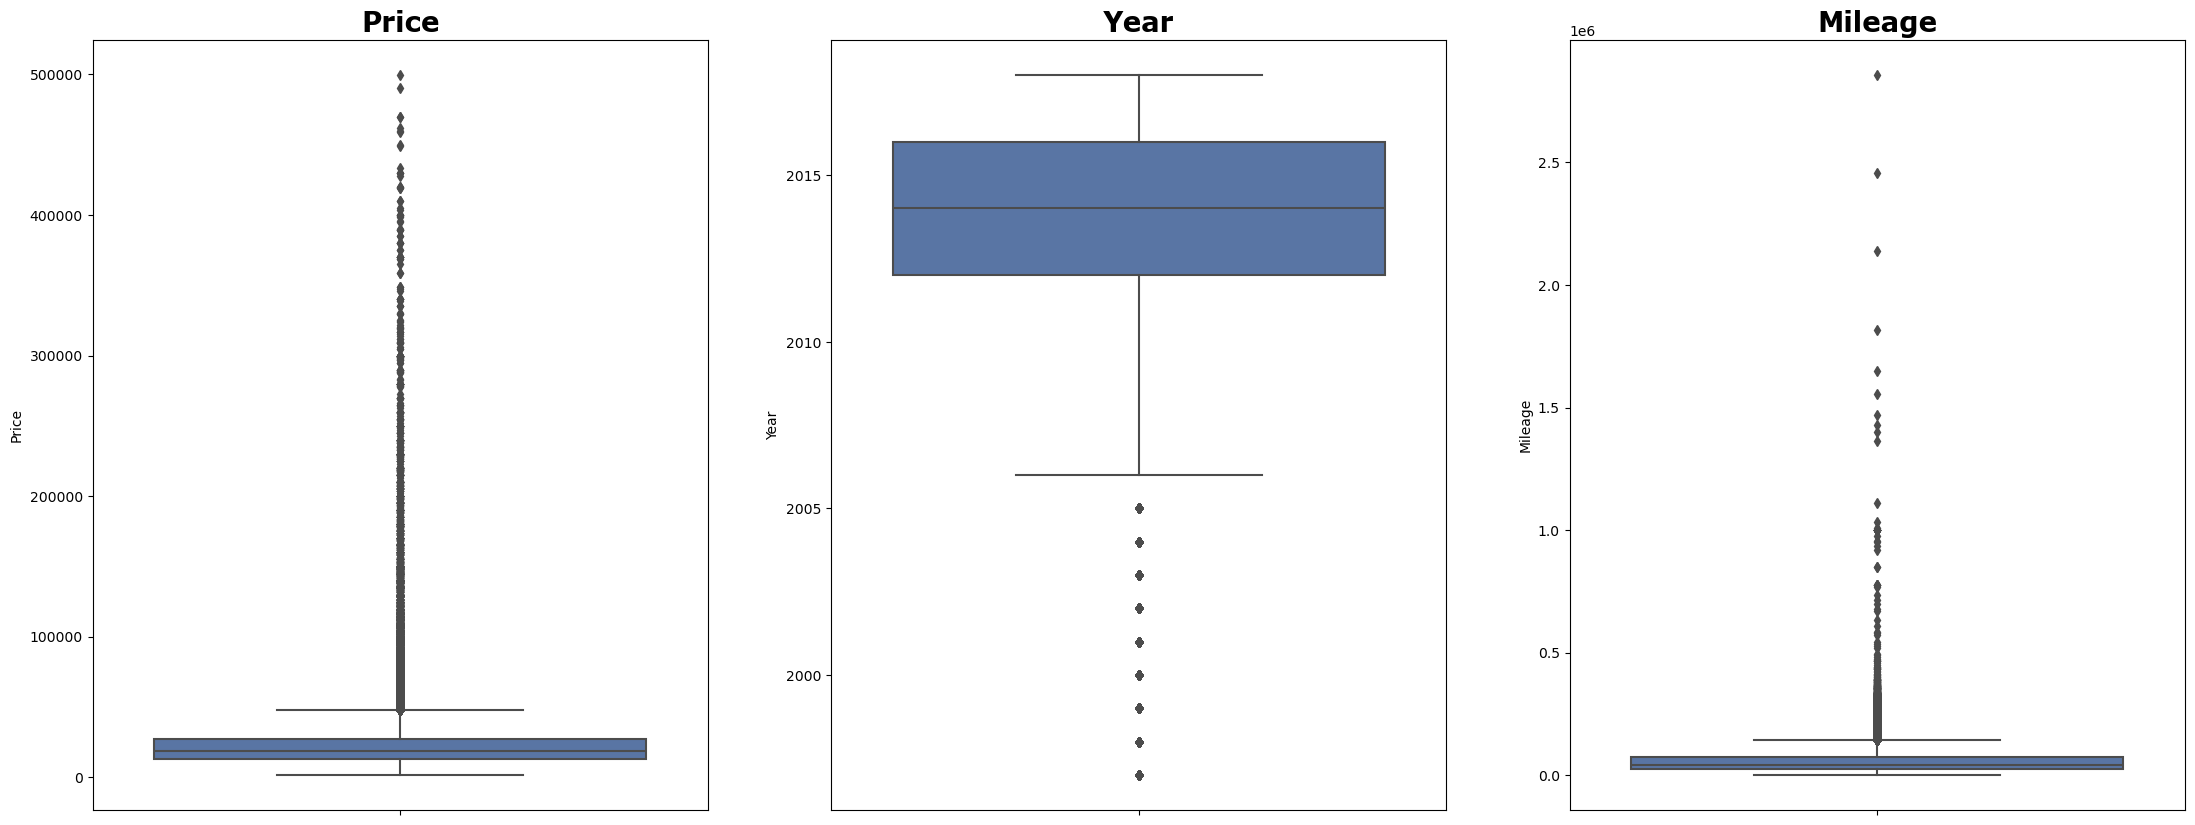

In [14]:
#Checking for outliers in the numerical columns
num_cols = ['Price', 'Year', 'Mileage']

fig, ax = plt.subplots(1, 3, figsize = (27, 10))
for i, col in enumerate(num_cols):
    g = sns.boxplot(data = df, y = col, ax = ax[i], palette = "deep")
    g.set_title(col, weight = "bold", fontsize = 20, fontname = "Verdana")

# EXPLORATORY DATA ANALYSIS

In [15]:
#Checking the number of categorical columns in the dataset
cat = df.select_dtypes(include='object').columns
len(cat)

5

In [16]:
#Checking for the unique values in the numerical column
for i in cat:
    print("The no.of unique values in",i,"are: ",df.loc[:,i].nunique())

The no.of unique values in City are:  2553
The no.of unique values in State are:  59
The no.of unique values in Vin are:  852075
The no.of unique values in Make are:  58
The no.of unique values in Model are:  2736


In [17]:
# Displaying Unique Categories in Specific Categorical Columns
categorical_columns = ['City','State','Model','Make']

for col in categorical_columns:
    
    print(f"Category in {col} is : {df[col].unique()}")

Category in City is : ['El Paso' 'Long Island City' 'Windsor' ... 'Winslow' 'Bergenfield'
 'Belmont']
Category in State is : [' TX' ' NY' ' CO' ' UT' ' FL' ' CT' ' ID' ' ND' ' CA' ' NJ' ' OH' ' VA'
 ' IN' ' AZ' ' OR' ' KS' ' NE' ' MA' ' MD' ' GA' ' MN' ' HI' ' LA' ' NM'
 ' IL' ' AL' ' PA' ' SC' ' NC' ' WA' ' WI' ' OK' ' KY' ' MS' ' MO' ' ME'
 ' AR' ' MI' ' NV' ' TN' ' Fl' ' NH' ' DE' ' WV' ' Az' ' VT' ' SD' ' IA'
 ' RI' ' ga' ' Oh' ' MT' ' DC' ' AK' ' Va' ' WY' ' Md' ' Ca' ' Ga']
Category in Model is : ['ILX6-Speed' 'ILX5-Speed' 'ILXAutomatic' ... 'V90' 'XC90T8' 'V60Polestar']
Category in Make is : ['Acura' 'Alfa' 'AM' 'Aston' 'Audi' 'Bentley' 'BMW' 'Buick' 'Cadillac'
 'Chevrolet' 'Chrysler' 'Dodge' 'Ferrari' 'FIAT' 'Fisker' 'Ford'
 'Freightliner' 'Genesis' 'Geo' 'GMC' 'Honda' 'HUMMER' 'Hyundai'
 'INFINITI' 'Isuzu' 'Jaguar' 'Jeep' 'Kia' 'Lamborghini' 'Land' 'Lexus'
 'Lincoln' 'Lotus' 'Maserati' 'Maybach' 'Mazda' 'McLaren' 'Mercedes-Benz'
 'Mercury' 'MINI' 'Mitsubishi' 'Nissan' 'Oldsmob

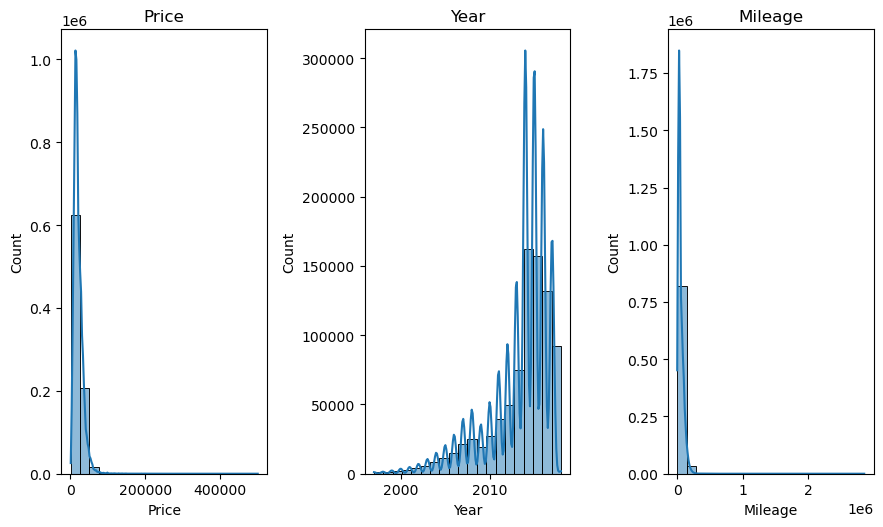

In [18]:
# Distribution of Numerical Features
numerical_features = ['Price', 'Year', 'Mileage']

plt.figure(figsize=(15, 15))
for feature in numerical_features:
    plt.subplot(3, 5, numerical_features.index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

# Price Distribution Analysis

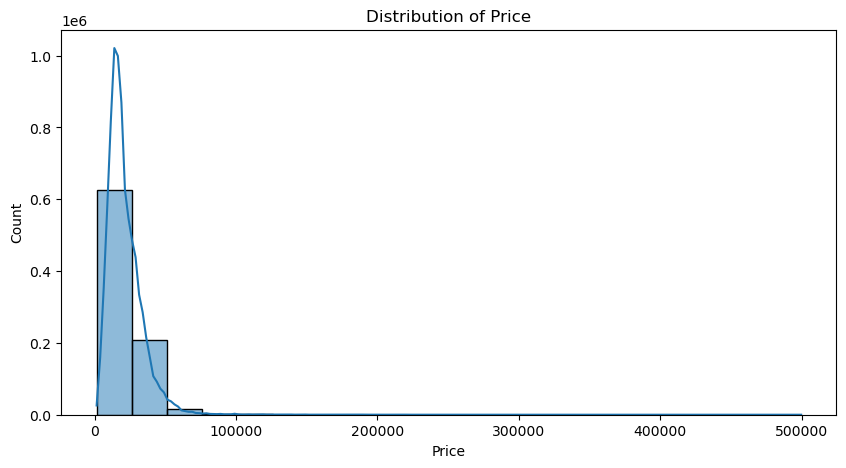

In [19]:
# Price Analysis
plt.figure(figsize=(10, 5))
sns.histplot(data=df['Price'], bins=20, kde=True)
plt.title('Distribution of Price')
plt.show()

 # Visualizing the Distribution of Categorical Columns

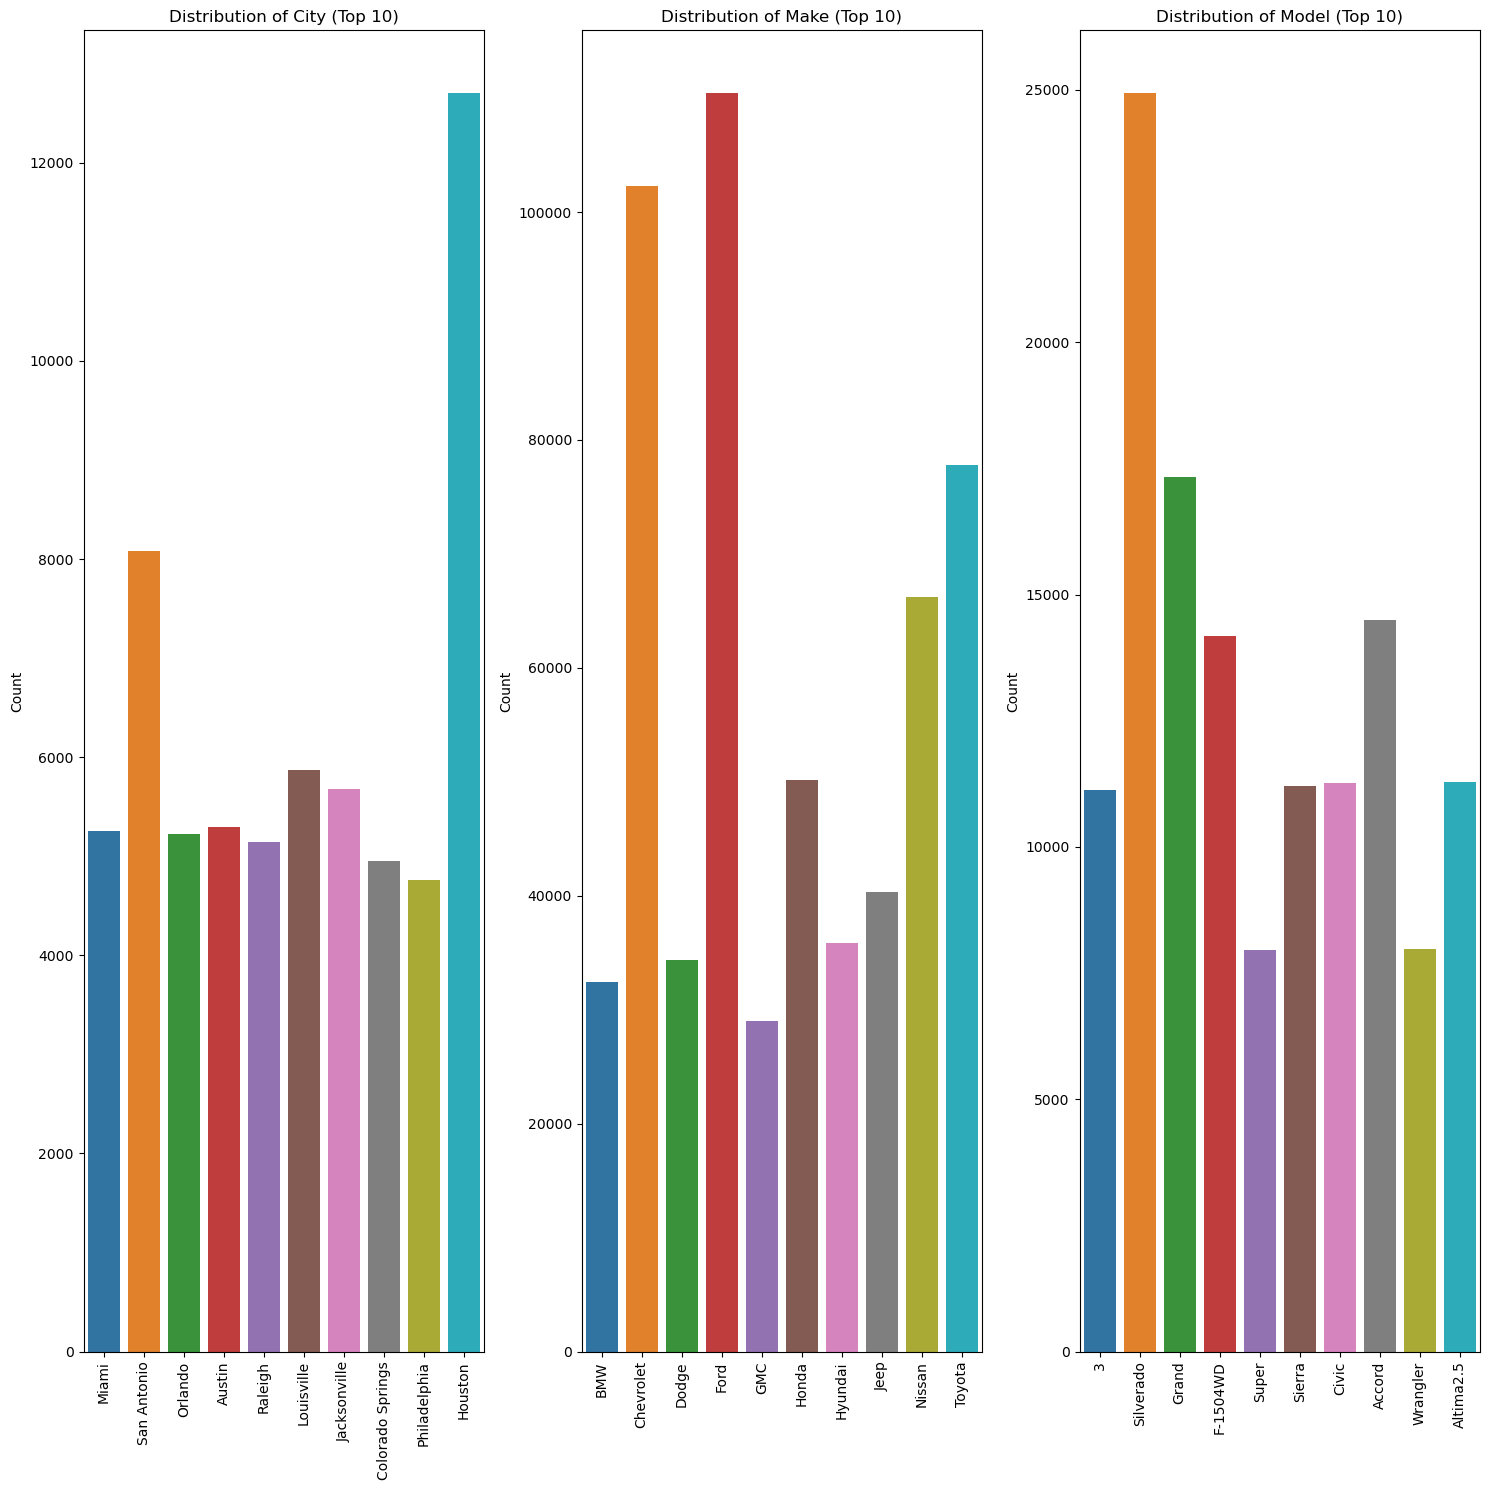

In [20]:
#visualizing the distribution of the categorical columns
# Adjust cat list for plotting top categories
cat = ['City', 'Make', 'Model']

# Limit the number of categories to display (e.g., top 10)
top_n = 10

# Determine the number of plots
num_plots = len(cat)
num_cols = 3
num_rows = num_plots // num_cols + int(num_plots % num_cols > 0)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
axes = axes.flatten()

# Plot top categories
for i, col in enumerate(cat):
    top_categories = df[col].value_counts().index[:top_n]
    sns.countplot(x=col, data=df[df[col].isin(top_categories)], ax=axes[i])
    axes[i].set_title(f'Distribution of {col} (Top {top_n})')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', labelrotation=90)

# Hide any unused subplots
for i in range(num_plots, num_rows * num_cols):
    axes[i].set_visible(False)

# Adjust layout and display
fig.tight_layout()
plt.show()

In [21]:
#visualizing categorical columns
num = df.select_dtypes(include=np.number).columns
len(num)

3

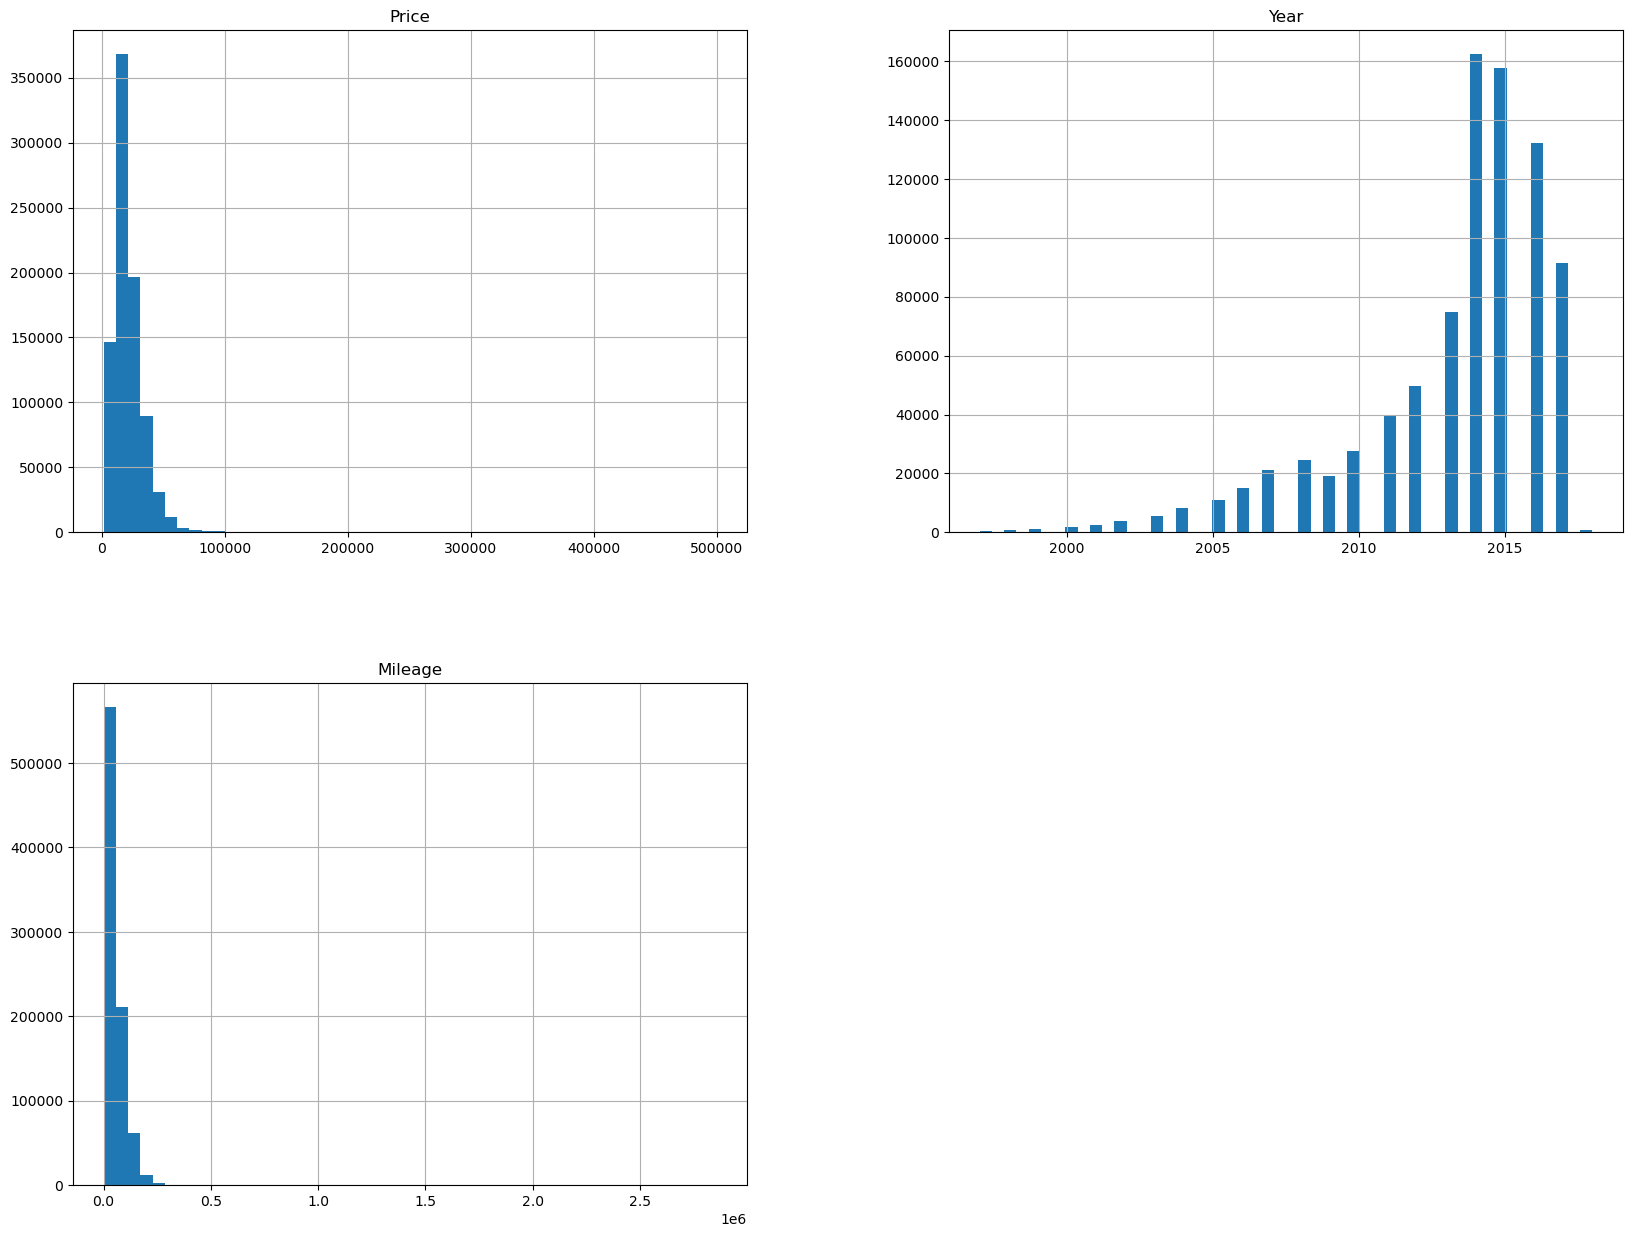

In [22]:
# visualizing the distribution of our numerical columns
df.hist(bins=50, figsize=(20,15))
plt.show()

Checking value counts for categorical columns and confirming the data type 

In [23]:
df['Price'].value_counts()

Price
14995    4898
12995    4600
13995    4591
9995     4298
15995    4282
         ... 
53385       1
52277       1
64521       1
45506       1
60240       1
Name: count, Length: 47124, dtype: int64

In [24]:
df['Year'].value_counts()

Year
2014    162432
2015    157516
2016    132136
2017     91608
2013     74701
2012     49764
2011     39768
2010     27539
2008     24713
2007     21171
2009     19061
2006     15079
2005     11005
2004      8117
2003      5649
2002      3800
2001      2584
2000      1933
1999      1254
2018       922
1998       774
1997       596
Name: count, dtype: int64

In [25]:
df['Mileage'].value_counts()

Mileage
10        635
5         350
11        232
12        213
15        183
         ... 
122574      1
191157      1
167585      1
300978      1
392123      1
Name: count, Length: 158836, dtype: int64

In [26]:
df['City'].value_counts()

City
Houston          12703
San Antonio       8078
Louisville        5872
Jacksonville      5675
Austin            5297
                 ...  
Pleasant Hill        4
Port Jervis          4
Los Banos            4
Pen Argyl            4
Royston              2
Name: count, Length: 2553, dtype: int64

In [27]:
df['State'].value_counts()

State
 TX    94654
 CA    80437
 FL    72530
 GA    39414
 IL    38680
 NC    37530
 VA    35011
 PA    28130
 NY    27932
 NJ    27852
 OH    23259
 WA    23149
 CO    23004
 AZ    22401
 TN    19166
 MA    17990
 MD    17572
 IN    16465
 MO    16165
 KY    13691
 AL    13293
 WI    11255
 MN    10996
 CT    10906
 UT    10418
 OR    10352
 MI    10328
 SC     9790
 OK     9584
 LA     8528
 KS     7894
 AR     6952
 NV     6887
 MS     6242
 NH     5694
 NE     4924
 IA     4840
 NM     4729
 ID     3501
 HI     2995
 DE     2418
 MT     1984
 ME     1920
 RI     1858
 AK     1663
 WV     1501
 SD     1267
 VT     1123
 ND     1092
 Fl      783
 WY      610
 Va      248
 Md      135
 Ga      109
 ga      100
 Az       63
 Oh       52
 Ca       31
 DC       25
Name: count, dtype: int64

In [28]:
df['Vin'].value_counts()

Vin
2G1FA1E37E9293949    2
1FMCU0GX9GUA19732    2
2GNALDEK3H1546084    2
KL8CD6S99EC501340    2
1GCPKPEX0AZ237480    2
                    ..
3FA6P0H98DR275040    1
1FM5K8D85DGB17256    1
2FMDK49C17BA50345    1
1FAHP2F89EG150104    1
YV4BC0ZX1H1109845    1
Name: count, Length: 852075, dtype: int64

In [29]:
df['Make'].value_counts()

Make
Ford             110432
Chevrolet        102268
Toyota            77786
Nissan            66250
Honda             50193
Jeep              40373
Hyundai           35837
Dodge             34368
BMW               32415
GMC               29008
Kia               28636
Mercedes-Benz     26323
Volkswagen        23249
Lexus             20641
Ram               19808
Subaru            16428
Chrysler          16357
Cadillac          15047
Mazda             13365
Audi              12618
Buick             12491
INFINITI          12258
Acura             11049
Lincoln            7120
Volvo              5106
MINI               4375
Porsche            4106
Land               4096
Mitsubishi         4080
Scion              3043
Jaguar             2200
Pontiac            1783
FIAT               1782
Mercury            1076
Maserati           1047
Saturn              963
HUMMER              949
smart               713
Bentley             367
Ferrari             345
Suzuki              334
Saab       

In [30]:
df['Model'].value_counts()

Model
Silverado          24932
Grand              17321
Accord             14502
F-1504WD           14177
Altima2.5          11288
                   ...  
EdgeLTD                1
ExpeditionEddie        1
EscortSE               1
Ranger                 1
V60Polestar            1
Name: count, Length: 2736, dtype: int64

Visualizing the Car Models by Frequency

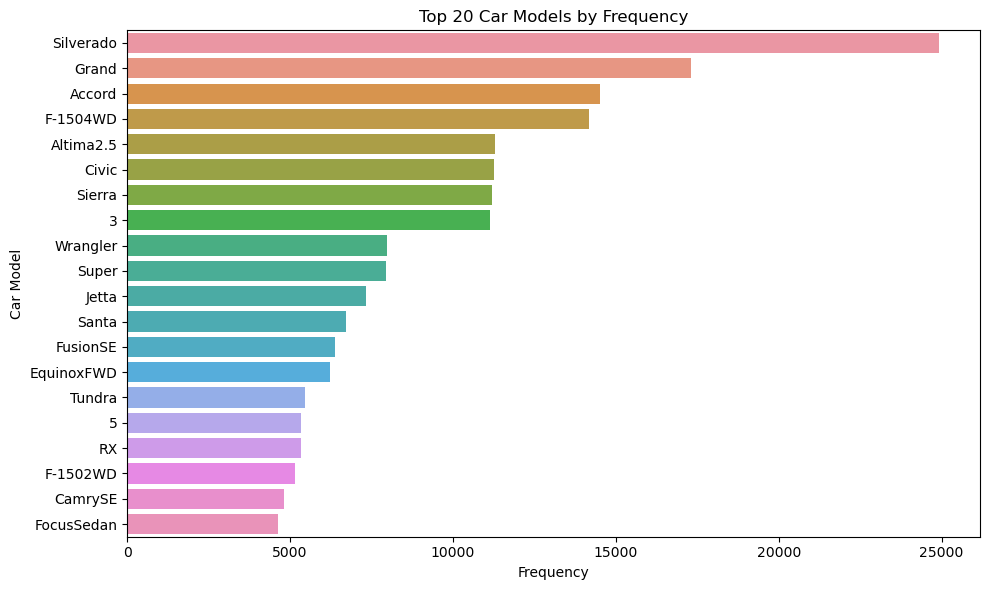

In [31]:
n = 20  # Number of top car models to plot
top_car_models = df['Model'].value_counts().head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

Visualizing Average Price

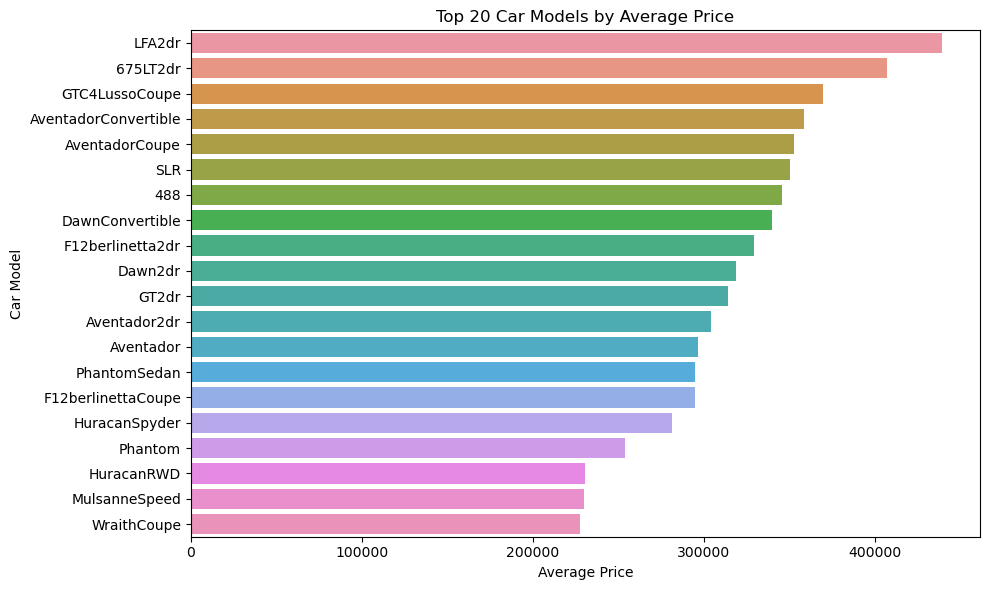

In [32]:
# EDA: Calculate and visualize average price for top N car models
avg_prices_by_car = df.groupby('Model')['Price'].mean().sort_values(ascending=False)
top_car_models = avg_prices_by_car.head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

Correlation Analysis

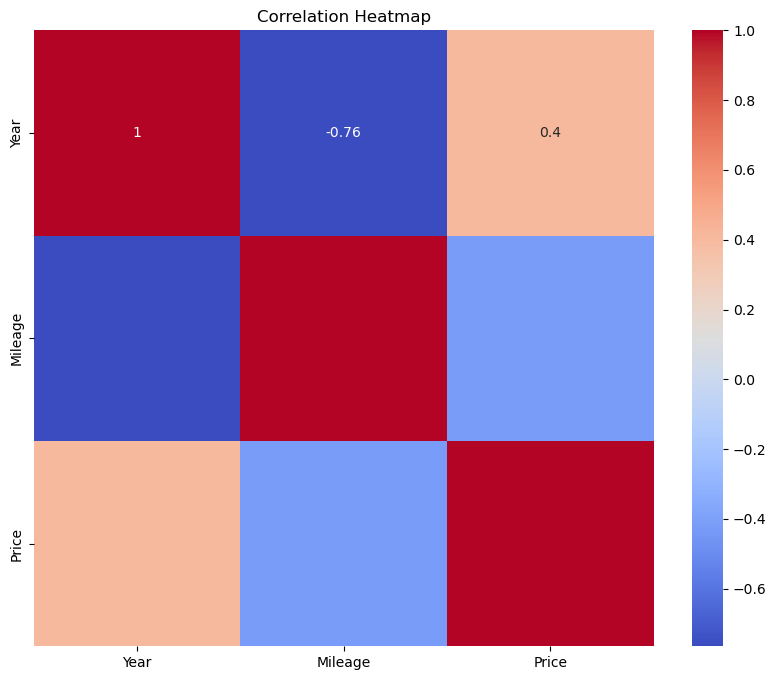

In [33]:
# EDA: Correlation analysis of numerical features
numerical_features = ['Year', 'Mileage', 'Price']  # Assuming these are the numerical features
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Feature Engineering and Preprocessing for Machine Learning

Extracting Features, Encoding Categorical Variables, and Scaling Numerical Features

In [34]:
# Extract brand and model from 'Model' column
df['brand'] = df['Make'].apply(lambda x: x.split(' ')[0])
df['model'] = df['Model'].apply(lambda x: x)
 
# Define categorical and numerical columns
categorical_columns = ['Make', 'Model', 'City', 'State', 'brand']
numerical_columns = ['Year', 'Mileage', 'Price']
 
# Encoding categorical variables
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
 
# Feature engineering
df['mileage_per_year'] = df['Mileage'] / (2024 - df['Year'])
for column in numerical_columns:
    df[f'{column}_squared'] = df[column] ** 2
df['log_mileage'] = np.log(df['Mileage'] + 1)
 
# Feature scaling
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

Linear Regression Model with One-Hot Encoding for Categorical Features

In [35]:
# Define the features and target
X = df.drop(['Price', 'Vin'], axis=1)  # Dropping non-numeric 'Vin' and target 'Price'
y = df['Price']

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'  # Leave the rest of the columns (numeric) as they are
)

# Creating the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Output the first few predictions
print(y_pred[:5])

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


[-0.10800054 -0.1486543  -0.01877821  0.78929444 -0.05076154]
Mean Squared Error: 0.4361161873960868


# Comparing Actual and Predicted Values After Model Prediction

Creating a DataFrame to Compare Model Performance

In [36]:
# After fitting the pipeline and making predictions
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Creating a DataFrame to compare the actual and predicted values
pred_df = pd.DataFrame({
    'Actual Value': y_test,         # The actual values from the test set
    'Predicted Value': y_pred,      # The predicted values from the model
    'Difference': y_test - y_pred   # The difference between actual and predicted values
})

# Display the DataFrame
pred_df.head()  # Displaying the first few rows of the DataFrame


,Actual Value,Predicted Value,Difference
729827,-0.306270,-0.108001,-0.198269
825968,-0.650851,-0.148654,-0.502197
353439,0.112598,-0.018778,0.131376
477184,2.370362,0.789294,1.581067
282908,-0.041490,-0.050762,0.009272


# Model Building

Machine learning pipeline for predicting the price of a vehicle based on various features, using three different regression models.


Linear Regression:
  Cross-validated MSE: 0.0701257194673263
  Test Set MSE: 0.06946522559709316
  Test Set MAE: 0.16091353159156993
  Test Set R2: 0.9301569302739138


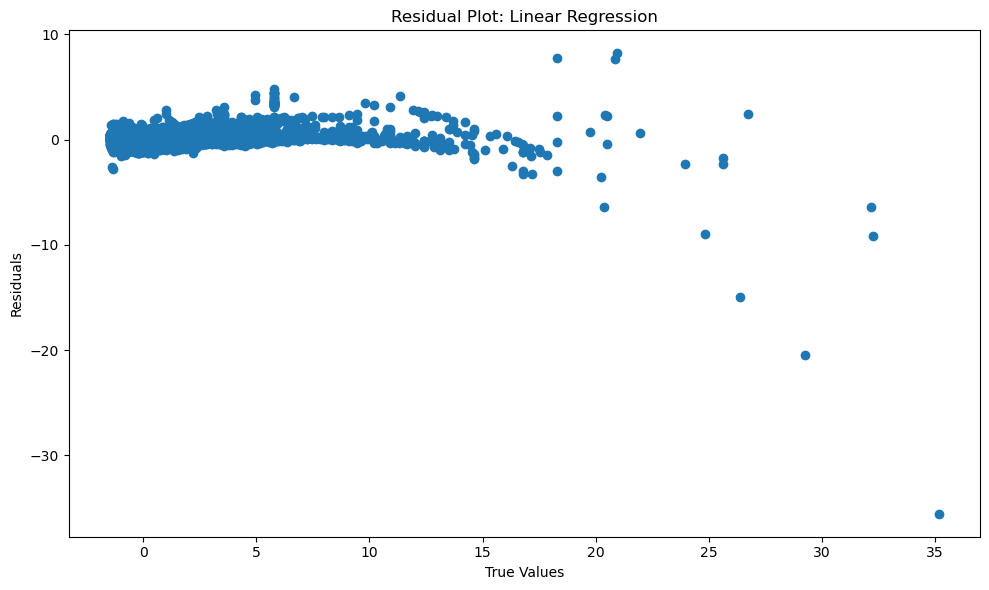


Ridge:
  Cross-validated MSE: 0.07120408540273734
  Test Set MSE: 0.07061046456708148
  Test Set MAE: 0.16090674453109818
  Test Set R2: 0.9290054619738198


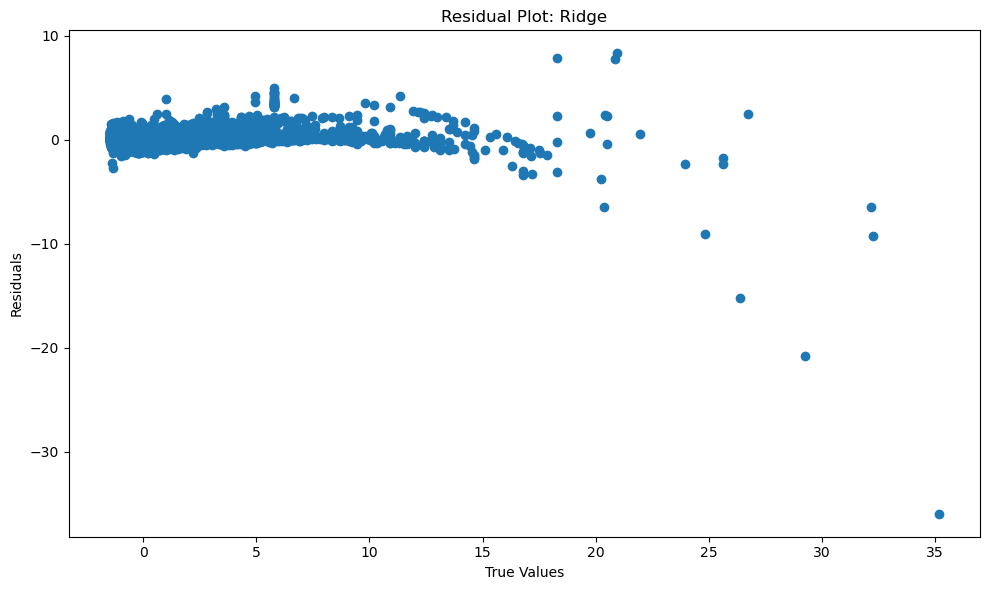


Lasso:
  Cross-validated MSE: 1.0013555825700136
  Test Set MSE: 0.9945949272486659
  Test Set MAE: 0.6691435017812666
  Test Set R2: -4.8550327762519885e-06


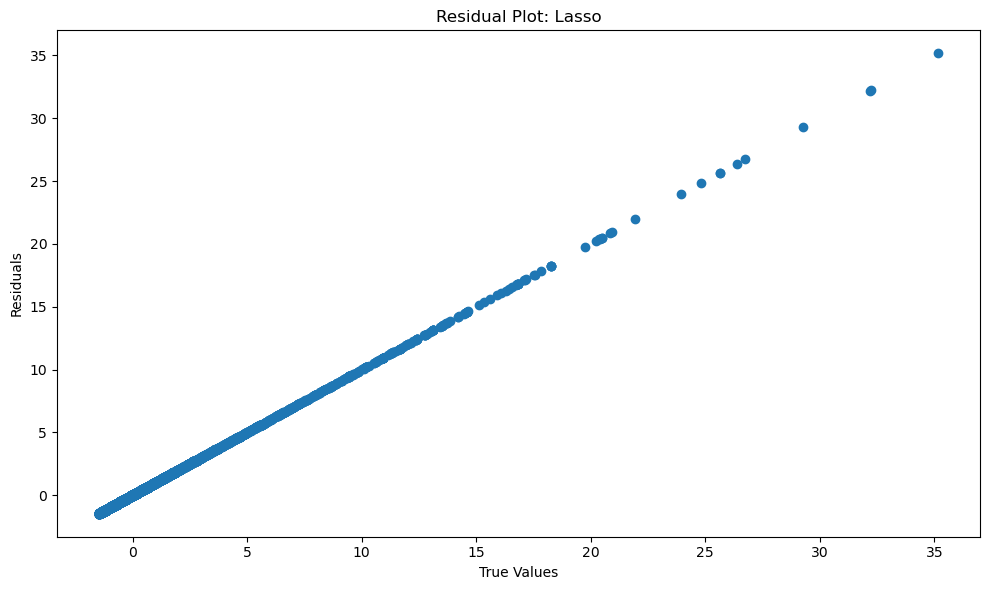


Baseline Model (Mean Regressor):
  Test Set MSE: 0.9945949272486659
  Test Set MAE: 0.6691435017812666
        Actual Value  Predicted Value  Difference
729827     -0.306270        -0.000439   -0.305830
825968     -0.650851        -0.000439   -0.650412
353439      0.112598        -0.000439    0.113037
477184      2.370362        -0.000439    2.370801
282908     -0.041490        -0.000439   -0.041050

Best parameters for Ridge Regression: {'model__alpha': 10.0}
Best cross-validated MSE: 0.07120201732374057

Final Ridge Regression Model:
Test MSE: 0.0706
Test R²: 0.9290


In [37]:
# Preprocessing: Dropping non-numeric 'Vin' and the target variable 'Price'
X = df.drop(['Price', 'Vin'], axis=1)
y = df['Price']

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=True), categorical_columns),
    ],
    remainder='passthrough'  # Leave the rest of the columns (numeric) as they are
)

# Model comparison: Linear Regression, Ridge, and Lasso
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso()
}

# Create pipelines for each model
pipelines = {name: Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False)),  # Set with_mean=False for sparse data
    ('model', model)
]) for name, model in models.items()}

# Baseline model for comparison
baseline = DummyRegressor(strategy='mean')

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cross-validation and fitting the models
for name, pipeline in pipelines.items():
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # Evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f'\n{name}:')
    print(f'  Cross-validated MSE: {-np.mean(cv_scores)}')
    print(f'  Test Set MSE: {mse}')
    print(f'  Test Set MAE: {mae}')
    print(f'  Test Set R2: {r2}')
    
    # Residuals Analysis
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_test - y_pred)
    plt.xlabel('True Values')
    plt.ylabel('Residuals')
    plt.title(f'Residual Plot: {name}')
    plt.tight_layout()
    plt.show()

# Baseline model fitting and evaluation
baseline.fit(X_train, y_train)
y_baseline_pred = baseline.predict(X_test)
baseline_mse = mean_squared_error(y_test, y_baseline_pred)
baseline_mae = mean_absolute_error(y_test, y_baseline_pred)

print(f'\nBaseline Model (Mean Regressor):')
print(f'  Test Set MSE: {baseline_mse}')
print(f'  Test Set MAE: {baseline_mae}')

# Comparison of Actual vs Predicted
pred_df = pd.DataFrame({
    'Actual Value': y_test,
    'Predicted Value': y_pred,
    'Difference': y_test - y_pred
})

# Display the first few rows of the DataFrame
print(pred_df.head())

# Additional: GridSearch for Model Tuning
param_grid = {
    'model__alpha': [0.1, 1.0, 10.0]
}

grid_search = GridSearchCV(pipelines['Ridge'], param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print(f"\nBest parameters for Ridge Regression: {grid_search.best_params_}")
print(f"Best cross-validated MSE: {-grid_search.best_score_}")

# Train the final Ridge model on the entire training set with the best hyperparameters
best_alpha = grid_search.best_params_['model__alpha']
best_ridge = Ridge(alpha=best_alpha)
best_ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False)),
    ('model', best_ridge)
])
best_ridge_pipeline.fit(X_train, y_train)

# Evaluate the final Ridge model on the test set
ridge_y_pred = best_ridge_pipeline.predict(X_test)
ridge_test_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_test_r2 = r2_score(y_test, ridge_y_pred)

print("\nFinal Ridge Regression Model:")
print(f"Test MSE: {ridge_test_mse:.4f}")
print(f"Test R²: {ridge_test_r2:.4f}")


# Model Performance Comparison: Ridge, Lasso, and Linear Regression Models

In [38]:
# For Ridge Regression
ridge_train_pred = pipelines['Ridge'].predict(X_train)
ridge_test_pred = pipelines['Ridge'].predict(X_test)

ridge_train_mse = mean_squared_error(y_train, ridge_train_pred)
ridge_test_mse = mean_squared_error(y_test, ridge_test_pred)
ridge_train_r2 = r2_score(y_train, ridge_train_pred)
ridge_test_r2 = r2_score(y_test, ridge_test_pred)

# For Lasso Regression
lasso_train_pred = pipelines['Lasso'].predict(X_train)
lasso_test_pred = pipelines['Lasso'].predict(X_test)

lasso_train_mse = mean_squared_error(y_train, lasso_train_pred)
lasso_test_mse = mean_squared_error(y_test, lasso_test_pred)
lasso_train_r2 = r2_score(y_train, lasso_train_pred)
lasso_test_r2 = r2_score(y_test, lasso_test_pred)

# For Linear Regression
linear_train_pred = pipelines['Linear Regression'].predict(X_train)
linear_test_pred = pipelines['Linear Regression'].predict(X_test)

linear_train_mse = mean_squared_error(y_train, linear_train_pred)
linear_test_mse = mean_squared_error(y_test, linear_test_pred)
linear_train_r2 = r2_score(y_train, linear_train_pred)
linear_test_r2 = r2_score(y_test, linear_test_pred)

# Create a dictionary of model names and their evaluation results
results = {
    'Ridge Regression': [ridge_test_mse, ridge_train_mse, ridge_test_r2, ridge_train_r2],
    'Lasso Regression': [lasso_test_mse, lasso_train_mse, lasso_test_r2, lasso_train_r2],
    'Linear Regression': [linear_test_mse, linear_train_mse, linear_test_r2, linear_train_r2]
}

# Convert the dictionary to a DataFrame
df_results = pd.DataFrame.from_dict(results, orient='index', columns=['Test MSE', 'Training MSE', 'Test R²', 'Training R²'])

# Display the DataFrame
print(df_results)

                   Test MSE  Training MSE   Test R²  Training R²
Ridge Regression   0.070610      0.066553  0.929005     0.933537
Lasso Regression   0.994595      1.001352 -0.000005     0.000000
Linear Regression  0.069465      0.065613  0.930157     0.934475


# Visual Comparison of Training and Test MSE for Regression Models

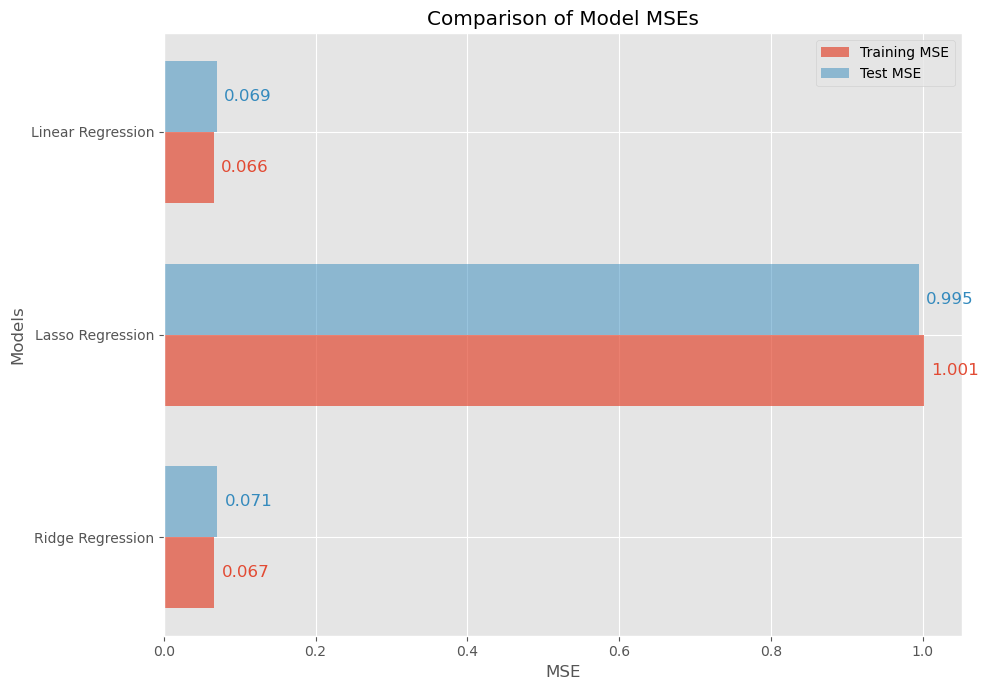

In [39]:
# Set the plot style
plt.style.use('ggplot')

# Create a horizontal bar plot for MSE
fig, ax = plt.subplots(figsize=(10, 7))

# Adjust the position of the bars slightly to avoid overlap
bar_width = 0.35  # Width of the bars

# Get indices for models
index = np.arange(len(df_results))

# Plot Training MSE
ax.barh(index - bar_width/2, df_results['Training MSE'], bar_width, label='Training MSE', color='C0', alpha=0.7)

# Plot Test MSE
ax.barh(index + bar_width/2, df_results['Test MSE'], bar_width, label='Test MSE', color='C1', alpha=0.5)

# Set labels, title, and ticks
ax.set_xlabel('MSE')
ax.set_ylabel('Models')
ax.set_title('Comparison of Model MSEs')
ax.set_yticks(index)
ax.set_yticklabels(df_results.index)

# Add Data Labels for Training MSE
for i, v in enumerate(df_results['Training MSE']):
    ax.text(v + 0.01, i - bar_width/2, f'{v:.3f}', color='C0', fontsize=12, va='center')

# Add Data Labels for Test MSE
for i, v in enumerate(df_results['Test MSE']):
    ax.text(v + 0.01, i + bar_width/2, f'{v:.3f}', color='C1', fontsize=12, va='center')

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()
